In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = pd.read_excel("C:\\Users\\Phil\\CaseStudy\\PSP_DATA_PREP.xlsx")
data.head()

,amount,success,3D_secured,hour,day_of_week,month,amount_norm,card_Diners,card_Master,card_Visa,country_Austria,country_Germany,country_Switzerland,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card
0,89,0,0,0,1,1,0.133013,0,0,1,0,1,0,0,0,0,1
1,89,1,0,0,1,1,0.133013,0,0,1,0,1,0,0,0,0,1
2,238,0,1,0,1,1,0.371795,1,0,0,0,1,0,0,0,0,1
3,238,1,1,0,1,1,0.371795,1,0,0,0,1,0,0,0,0,1
4,124,0,0,0,1,1,0.189103,1,0,0,1,0,0,0,0,1,0


In [3]:
# Define the feature matrix X and target y, and split data into training and testing sets
X = data.drop(columns=['success'])
y = data['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train a logistic regression model and make a prediction
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)

In [5]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1

(0.8111485816306289, 0.6176470588235294, 0.021875, 0.04225352112676056)

In [6]:
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}")

Accuracy: 0.8111485816306289
Precision: 0.6176470588235294
Recall: 0.021875
F1: 0.04225352112676056


In [7]:
cm = confusion_matrix(y_test, y_pred)

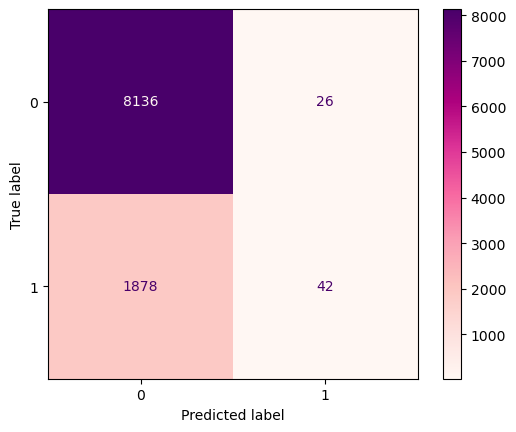

In [8]:
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')
plt.show()

In [4]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

In [6]:
smote_model = LogisticRegression(max_iter=1000)
smote_model.fit(X_train_smote, y_train_smote)
smote_y_pred = smote_model.predict(X_test_smote)

In [7]:
accuracy = accuracy_score(y_test_smote, smote_y_pred)
precision = precision_score(y_test_smote, smote_y_pred)
recall = recall_score(y_test_smote, smote_y_pred)
f1 = f1_score(y_test_smote, smote_y_pred)

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}")

Accuracy: 0.8494854202401372
Precision: 0.9865256694524988
Recall: 0.7086498407253125
F1: 0.824812834224599


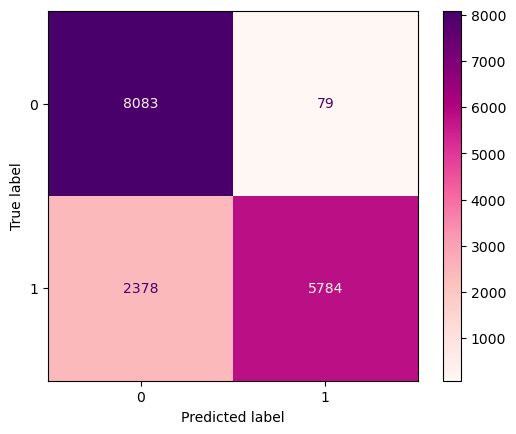

In [8]:
smote_cm = confusion_matrix(y_test_smote, smote_y_pred)
disp = ConfusionMatrixDisplay(smote_cm)
disp.plot(cmap='RdPu')
plt.show()